## SENTIMENT ANALYSIS USING MULTINOMIAL NAIVE BAYES
##### AND COMPARISION WITH OTHER MACHINE LEARNING ALGORITHMS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
df.shape

(50000, 2)

In [4]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [7]:
vectorizer = TfidfVectorizer(min_df = 2, max_df = 0.5, ngram_range = (2,2))
X = vectorizer.fit_transform(df.review)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,df.sentiment, test_size = 0.2, random_state=2)

In [9]:
print(x_train.shape, y_train.shape)

(40000, 684160) (40000,)


In [10]:
y_train = y_train.replace({'positive': 1, 'negative': 0}).values
y_test = y_test.replace({'positive': 1, 'negative': 0}).values

In [11]:
y_train

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
MNB = MultinomialNB()
MNB.fit(x_train, y_train)
accuracy = metrics.accuracy_score(MNB.predict(x_test), y_test)

In [13]:
print(accuracy)

0.8944


In [14]:
import re
import string
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize,WordNetLemmatizer
nltk.download('all')
from bs4 import BeautifulSoup

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\abybi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\abybi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\abybi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\abybi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\abybi\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\abybi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\abybi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\abybi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\abybi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\abybi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat

[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\abybi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\abybi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\abybi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\abybi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\abybi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal

In [86]:
stemmer = PorterStemmer()
tokenizer = word_tokenize
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [87]:
def clean_html(text):
    soup = BeautifulSoup(''.join(text), 'html.parser')
    return soup.get_text()

def preprocess(text):
    text = clean_html(text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    tokens = tokenizer(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words and token not in string.punctuation]
    return ' '.join(stemmed_tokens)

In [88]:
x_pre = df.review.apply(preprocess)

C:\Users\abybi\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [89]:
df.review[10]

'Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn\'t find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partaking.<br /><br />For something similar but better try "Brother from another planet"'

In [90]:
x_pre[10]

'phil alien one quirki film humour base around odd everyth rather actual punchlin at first odd pretti funni movi progress i find joke odd funni anymor it low budget film that never problem pretti interest charact eventu i lost interest i imagin film would appeal stoner current partak for someth similar better tri brother anoth planet'

In [91]:
vectorizer_2 = TfidfVectorizer(min_df = 2, max_df = 0.5, ngram_range = (2,2))

In [92]:
x_pre_tfidf = vectorizer_2.fit_transform(x_pre)

In [93]:
x_pre_train, x_pre_test, y_pre_train, y_pre_test = train_test_split(x_pre_tfidf, df.sentiment, test_size = 0.2, random_state = 42)

In [94]:
y_pre_train = y_pre_train.replace({'positive': 1, 'negative': 0}).values
y_pre_test = y_pre_test.replace({'positive': 1, 'negative': 0}).values

In [95]:
MNB_2 = MultinomialNB()
MNB_2.fit(x_pre_train, y_pre_train)
accuracy_pre = metrics.accuracy_score(MNB_2.predict(x_pre_test),y_pre_test)

In [96]:
print(accuracy_pre)

0.8946


In [97]:
"""
def clean_html(text):
    soup = BeautifulSoup(''.join(text), 'html.parser')
    return soup.get_text()

def preprocess(text):
    text = clean_html(text)
    tokens = tokenizer(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words and token not in string.punctuation]
    return ' '.join(stemmed_tokens)
"""

"\ndef clean_html(text):\n    soup = BeautifulSoup(''.join(text), 'html.parser')\n    return soup.get_text()\n\ndef preprocess(text):\n    text = clean_html(text)\n    tokens = tokenizer(text)\n    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words and token not in string.punctuation]\n    return ' '.join(stemmed_tokens)\n"

In [98]:
'''
def clean_html(text):
    soup = BeautifulSoup(''.join(text), 'html.parser')
    return soup.get_text()

def preprocess(text):
    text = clean_html(text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    tokens = tokenizer(text)
    return ' '.join(tokens)
    '''

"\ndef clean_html(text):\n    soup = BeautifulSoup(''.join(text), 'html.parser')\n    return soup.get_text()\n\ndef preprocess(text):\n    text = clean_html(text)\n    text = re.sub('\\W', ' ', text)\n    text = re.sub('\\s+', ' ', text)\n    tokens = tokenizer(text)\n    return ' '.join(tokens)\n    "

In [99]:
x_train.shape

(40000, 684160)

In [100]:
x_pre_train.shape

(40000, 668159)

In [101]:
from sklearn.metrics import confusion_matrix, classification_report

In [102]:
print(classification_report(y_pre_test,MNB_2.predict(x_pre_test), target_names=['negative', 'positive']))
cfm = confusion_matrix(y_pre_test, MNB_2.predict(x_pre_test))
print(cfm)

              precision    recall  f1-score   support

    negative       0.89      0.90      0.89      4961
    positive       0.90      0.89      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

[[4483  478]
 [ 576 4463]]


<AxesSubplot:>

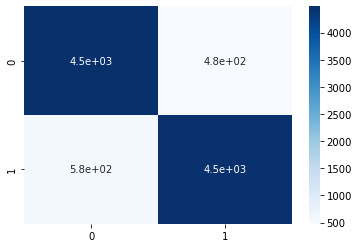

In [103]:
sns.heatmap(cfm, annot = True, cmap = 'Blues')

In [104]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

0.8788
              precision    recall  f1-score   support

    negative       0.90      0.85      0.87      4961
    positive       0.86      0.90      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



<AxesSubplot:>

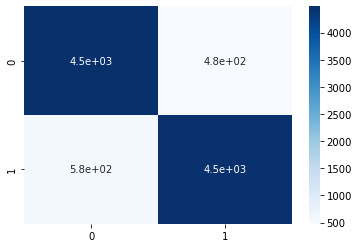

In [105]:
LR.fit(x_pre_train, y_pre_train)
predict_lr = LR.predict(x_pre_test)
accuracy_lr = metrics.accuracy_score(predict_lr, y_pre_test)
print(accuracy_lr)
print(classification_report(y_pre_test, predict_lr, target_names = ['negative', 'positive']))
cfm_lr = confusion_matrix(y_pre_test, predict_lr)
sns.heatmap(cfm, annot = True, cmap = 'Blues')

In [106]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier()

0.8647
              precision    recall  f1-score   support

    negative       0.92      0.80      0.85      4961
    positive       0.82      0.93      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



<AxesSubplot:>

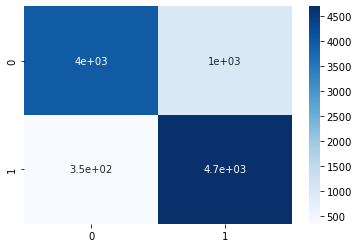

In [107]:
SGDC.fit(x_pre_train, y_pre_train)
predict_sgdc = SGDC.predict(x_pre_test)
accuracy_sgdc = metrics.accuracy_score(predict_sgdc, y_pre_test)
print(accuracy_sgdc)
print(classification_report(y_pre_test, predict_sgdc, target_names = ['negative', 'positive']))
cfm_sgdc = confusion_matrix(y_pre_test, predict_sgdc)
sns.heatmap(cfm_sgdc, annot = True, cmap = 'Blues')

In [108]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()

0.8927
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



<AxesSubplot:>

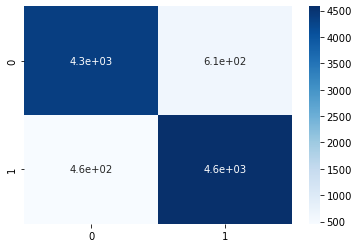

In [110]:
lsvc.fit(x_pre_train, y_pre_train)
predict_lsvc = lsvc.predict(x_pre_test)
accuracy_lsvc = metrics.accuracy_score(predict_lsvc, y_pre_test)
print(accuracy_lsvc)
print(classification_report(y_pre_test, predict_lsvc, target_names = ['negative', 'positive']))
cfm_lsvc = confusion_matrix(y_pre_test, predict_lsvc)
sns.heatmap(cfm_lsvc, annot = True, cmap = 'Blues')

In [3]:
from gensim.models import KeyedVectors

In [11]:
glove_path = '../Downloads/glove.6B/glove.6B.100d.txt'
glove_vectors = KeyedVectors.load_word2vec_format(glove_path, binary = False)

ValueError: invalid literal for int() with base 10: 'the'

In [17]:
def load_embedding_model():
    """ Load GloVe Vectors
        Return:
            wv_from_bin: All 400000 embeddings, each lengh 200
    """
    import gensim.downloader as api
    wv_from_bin = api.load("glove-wiki-gigaword-100")
    print("Loaded vocab size %i" % len(list(wv_from_bin.index_to_key)))
    return wv_from_bin

In [18]:
wv_from_bin = load_embedding_model()


[==================================================] 100.0% 128.1/128.1MB downloaded
Loaded vocab size 400000


In [38]:
wv_from_bin['aby']

array([ 0.1575   , -0.16767  , -1.4925   , -0.21487  , -0.62365  ,
       -0.027396 ,  0.21509  , -0.34839  ,  0.36487  ,  0.090499 ,
        1.0147   ,  0.34815  , -0.71975  , -0.1573   , -0.20722  ,
        0.040014 ,  0.26222  , -0.0060542, -0.17997  ,  0.66164  ,
       -0.14803  , -0.32403  ,  0.22205  ,  0.44547  ,  0.32521  ,
       -0.13594  ,  0.74035  ,  0.13764  , -0.60096  ,  0.30411  ,
       -0.030044 , -0.20194  ,  0.080416 ,  0.24967  ,  0.15077  ,
       -0.33485  ,  0.50667  , -0.54176  ,  0.53509  , -0.021005 ,
       -0.16864  ,  0.10348  , -0.35994  ,  0.064011 , -0.672    ,
       -0.025148 ,  0.24879  ,  0.11773  , -0.28635  ,  0.091585 ,
        0.17089  , -0.068423 ,  0.20612  , -0.29149  ,  0.041356 ,
        0.49888  ,  0.12262  ,  0.38618  , -0.7885   , -0.015396 ,
       -0.28006  , -0.26771  , -0.34905  ,  0.015609 , -0.43929  ,
        0.40191  ,  0.49623  , -0.33207  , -0.11273  ,  0.075043 ,
        0.091801 ,  0.66157  , -0.5224   , -0.73027  , -0.3499

In [39]:
def map_words_to_vector(text, model):
    words = text.split()
    vectors = []
    for word in words:
        if word in model:
            vectors.append(model[word])
    return np.array(vectors)